# Title 

**Course Project on Data collection and Storage.**

# Introduction

**The major line of this project is to as an analyst of a ride share company to study patterns in the available data
by probing the understanding on customers preference and the influence of some external factors on ride or rider.**
**Some EDA and hypotheses testing will be performed on the given scenario follow by some explaination.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good introduction!

In [1]:
from scipy import stats as st
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
df_01 = pd.read_csv('/datasets/project_sql_result_01.csv') 

In [3]:
df_04 = pd.read_csv('/datasets/project_sql_result_04.csv')

In [4]:
df_04.sample()

,dropoff_location_name,average_trips
46,Chinatown,52.433333


In [5]:
df_04.head()
# We store the original 'dropoff_location_name'and 'average_trips' content temporarily
temp1_content = df_04['dropoff_location_name']
temp2_content = df_04['average_trips']


In [6]:
df_04 = df_04.drop_duplicates()

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Great! </div>

In [7]:
df_04.duplicated().sum()

0

In [8]:
df_04.rename(columns={'company_name': 'dropoff_location_name'}, inplace=True)
df_04['dropoff_location_name'] = temp1_content
df_04.rename(columns={'trips_amount': 'average_trips'}, inplace=True)
df_04['average_trips'] = temp2_content


In [9]:
df_04.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


# Identify the top 10 neighborhoods in terms of drop-offs

In [10]:
top_ten = df_04.sort_values(by='average_trips', ascending=False).head(10)
display(top_ten)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


**The above file appear to show no sign of missing values**

**A duplicate filter was applied as well and resulting in zero duplicate.**

**The data type display refect was is expect for the dropoff_location_name and average_trips fields.However if the a unit trip
is understood as leaving from point A to point B i think int() type will be my choice but if a trip is interupted because of some unpredictable raison between point A and point B is consider a half trip then float() type is preferable.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good! 
    
</div>


# 2.0 Visualization and study of the data.

In [11]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [12]:
df_01 = df_01.drop_duplicates()

In [13]:
df_01.duplicated().sum()

0

In [14]:
df_01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


**The above file appear to show no sign of missing values**

**A duplicate filter was applied as well and resulting in zero duplicate.**

**The data type display refect was is expect for the company_name and trips_amount fields.**

**The above file appear to show no sign of missing values**

**A duplicate filter was applied as well and resulting in zero duplicate.**

**The data type display refect was is expect for the dropoff_location_name and average_trips fields.However if the a unit trip
is understood as leaving from point A to point B i think int() type will be my choice but if a trip is interupted because of some unpredictable raison between point A and point B is consider a half trip then float() type is preferable.**

# Make graphs: taxi companies and number of rides

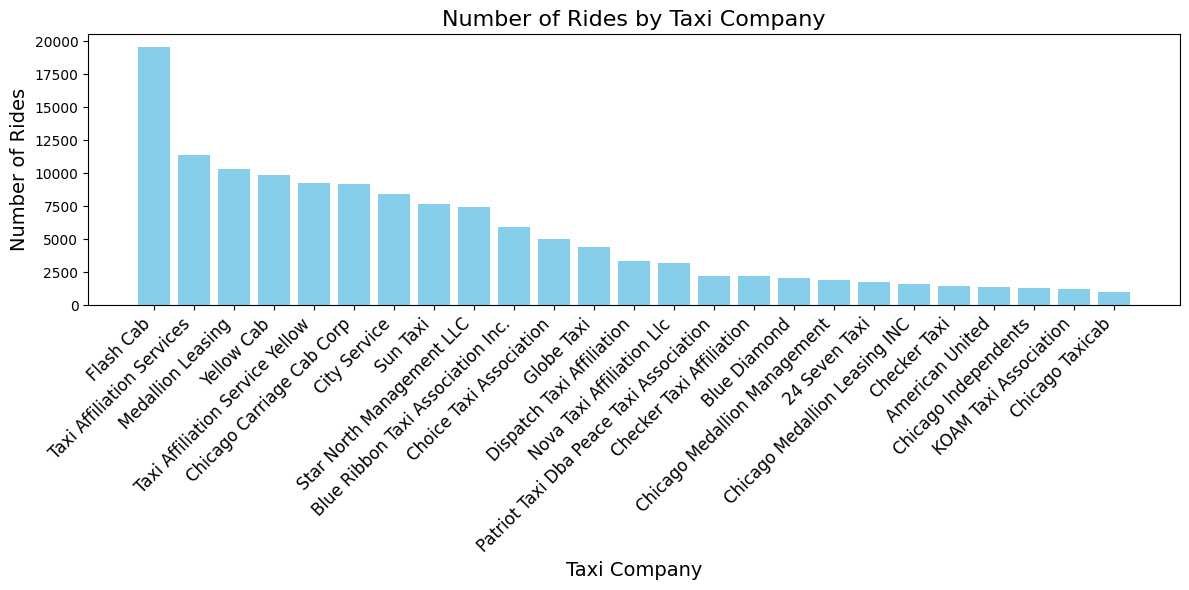

In [15]:
# We filter out taxi companies with < 1000 rides for better visualization
df_01_filtered = df_01[df_01['trips_amount'] > 1000]
df_01_sorted = df_01_filtered.sort_values(by='trips_amount', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(df_01_sorted['company_name'], df_01_sorted['trips_amount'], color='skyblue')
plt.title('Number of Rides by Taxi Company', fontsize=16)
plt.xlabel('Taxi Company', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

**For better visualization we inserted a filter to remove all company with < 1000 rides.**

**The plot show very clearly that the company "Flash Cab" dominate in term of number of ride all the others company.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Agreed. 
    
</div>

# Make graph :Top 10 neighborhoods by number of dropoffs

In [16]:
df_04.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

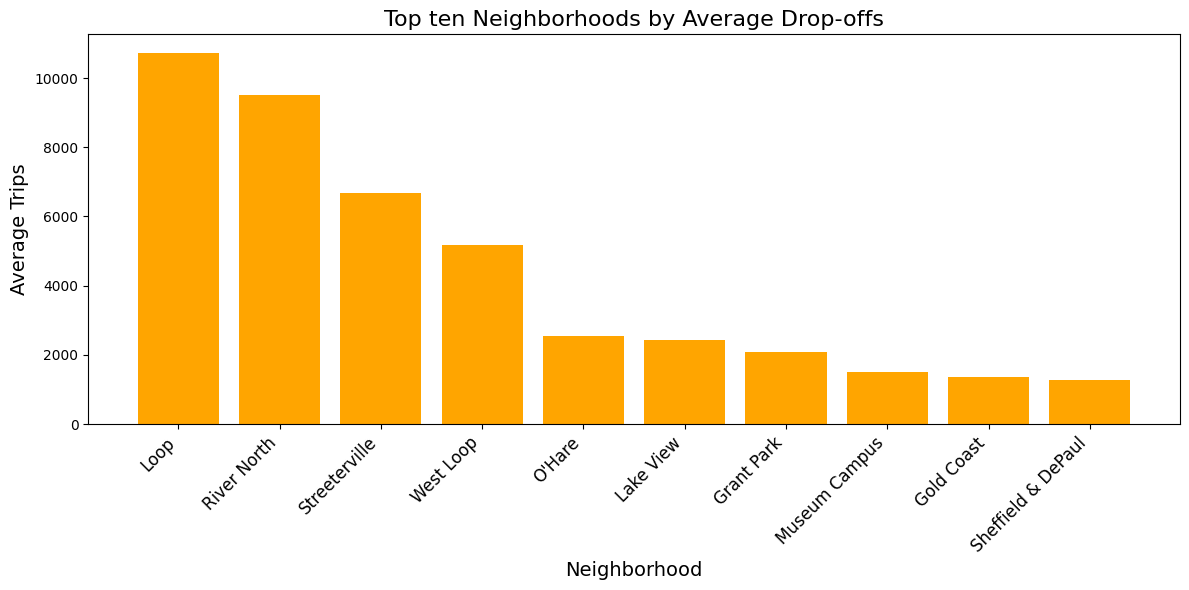

In [17]:
top_ten = df_04.sort_values(by='average_trips', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_ten['dropoff_location_name'], top_ten['average_trips'], color='orange')
plt.title('Top ten Neighborhoods by Average Drop-offs', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Trips', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

**As we see clearly display on the plot the neighborhood 'loop' show the strong average trips.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
It's good that you sort data and add a title with labels 👍
    
</div>

# Testing hypotheses

In [18]:
df_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [19]:
df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [20]:
df_07 = df_07.drop_duplicates()

In [21]:
df_07.duplicated().sum()

0

In [22]:
df_07.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [23]:
#display(df_07['start_ts'])

# Null Hypothesis : 
**The average ride duration on rainy Saturdays is equal to the average ride duration on non-rainy Saturdays.**

# Alternative Hypothesis : 
**The average ride duration on rainy Saturdays is different from the average ride duration on non-rainy Saturdays.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
True. The Null hypothesis always states the equality.

</div>


In [24]:
# We convert 'start_ts' to datetime to extract the day of the week
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])
df_07['day_of_week'] = df_07['start_ts'].dt.day_of_week  # 0 = Monday, 6 = Saturday


In [25]:
# We filter for rainy Saturdays (weather condition 'Good' or 'Bad' and day_of_week == 6)
#rainy_saturdays = df_07[(df_07['weather_conditions'].str.contains('Bad', case=False)) & (df_07['day_of_week'] == 6)]
rainy_saturdays = df_07[(df_07['weather_conditions'] == 'Bad') & 
                     (df_07['start_ts'].dt.day_name() == 'Saturday')]

In [26]:
# We filter for non-rainy Saturdays (weather condition not 'rain' and day_of_week == 6)
#non_rainy_saturdays = df_07[~df_07['weather_conditions'].str.contains('Good', case=False) & (df_07['day_of_week'] == 6)]
#non_rainy_saturdays = df_07[df_07['weather_conditions'].str.contains('Good', case=False, na=False) == False & (df_07['day_of_week'] == 6)]
non_rainy_saturdays = df_07[(df_07['weather_conditions'] == 'Good') & 
                     (df_07['start_ts'].dt.day_name() == 'Saturday')]

In [27]:
display(f"Rainy Saturdays: {len(rainy_saturdays)}")
display(f"Non-rainy Saturdays: {len(non_rainy_saturdays)}")

'Rainy Saturdays: 148'

'Non-rainy Saturdays: 723'

In [28]:
print(df_07['weather_conditions'].unique())

['Good' 'Bad']


In [29]:
print(pd.to_datetime(df_07['start_ts']).dt.day_name().unique())

['Saturday']


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    
**My filter for rainy_saturday and non_rainy_saturday was not set up properly that is why i was getting an empty array.**

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;"> 
    
**Code was modified .**


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Correct! </div>

In [30]:
# We calculate the average duration
avg_rainy_duration = rainy_saturdays['duration_seconds'].mean()
avg_non_rainy_duration = non_rainy_saturdays['duration_seconds'].mean()

In [42]:
# We perform a t-test to compare the two groups
t_stat, p_value = st.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])

display(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
        display("The difference in ride durations is statistically significant.")
else:
        display("The difference in ride durations is not statistically significant.")

'T-statistic: 5.427957689754561, P-value: 7.397770692813658e-08'

'The difference in ride durations is statistically significant.'

**Since the p-value is much smaller than 0.05, we reject the null hypothesis. This means that the average ride duration on rainy Saturdays is significantly different from the average ride duration on non-rainy Saturdays.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    
Correct! </div>

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;"
**Sorry for not pointing this sonner, all the step to understand why the P-value came as 'nan' was done below this comment cell.**

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;"
**Sorry for not pointing it out sonner, all the step for attempting to understand why the P-value came as 'nan' was done below.** 

# Conclusion

**During the course of this project we were able to count the number of ride for each taxi company on a filtered specific date.we were also able to filtered thru the type of taxi(yellow or blue) for a ride count and we use identifiers for certains neighborhood to retrieve waether condition and also the start point and end point for ride.**
**After reading in all the file we notice no major anomalies processing the data.**
**As for the hypothesis texting we can observe that with a much lower P-value which indicate a significant difference in ride durations between the two groups could mean that:
People might take shorter or longer rides due to rain (depending on the context).
Environmental factors (road conditions or safety concerns) might impact ride durations.**
**As a practical observation the ride share company can use this insight to dynamically adjust pricing or availability during rainy weather on Saturdays and on the safety aspect we see that if rainy weather correlates with significantly shorter durations, it might signal hurried travel, leading to potential safety risks.The company could promote safety campaigns or implement policies like reduced speed limits during rain.**



<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    
**Conclusion was updated as well.** 

**THANK YOU.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    
Thank you for such a good job :) 

</div>